## Big Question

My question is which model between logistic regression and perceptron would yield better results? I will be comparing the results of their accuracy based on the testing data from each of them. Using the IMDB movie data I will be comparing the sentiment of the data recorded and the predicted data from the model.

## Data

    Using the IMDB Movies file, movies.csv, which is composed of text data and binary data on sentiment.

## Data preprocessing

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# reading csv, getting testing and training data.
df = pd.read_csv('movies.csv', header = 0, encoding = 'UTF-8')
df_train = df.iloc[0:250,0:] # 80% training data
df_test = df.iloc[1001:1200,0:] # 20% test data
df
# traing data, text and binary value
Y_train = df_train["sentiment"].values
text_train = df_train["review"].values

# testing data, text and binary value
Y_test = df_test["sentiment"].values
text_test = df_test["review"].values

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
1194,I was so surprised when I saw this film so muc...,1
1195,I was greatly disappointed by the quality of t...,0
1196,I've tried to reconcile why so many bad review...,1
1197,"WARNING: SPOILER,SPOILER,SPOILER!!!!<br /><br ...",1


## Model selection and tuning

_Using this cell, please write a short, clear paragraph explaining how you selected and tuned your model for the project. You must answer the following questions in this cell (1) Why is your model an appropriate choice for your data? (2) What hyperparameters does your model have and how did you select them? (3) What features did you choose and why?_

You must, at minimum:
1. Engineer one feature
2. Tune one hyperparameter
3. Make a plot or table examining performance of your model under different parameter settings

    Logistic regression is a good model to use because it works great for binary classification. Perceptron is an alternative model that is being tested. My model has the hyperparameters loss, because i needed it to specify logistic regression. Max_iter to control the iterations, tol is used for stopping criteria, alpha is used as a constant to manipulate the results, and random state was just used to randomize the data. I chose word_pair_features to compare how the words in the text correlate to the sentiment value. I am trying to see how the classifier would preform with the pairs.

In [74]:
## Feature engineering. Please include your code for feature engineering in this cell. 
from collections import Counter

# returns pairs of a sentence
def word_pair_features(text):
    import itertools
    words = text.lower().split()
    pairs = list(itertools.combinations(words, 2))
    return Counter(pairs)

In [75]:
## Code for model selection and tuning.  Please include your code for model selection and tuning in this cell
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict

# tuning parameters
vect = DictVectorizer()
X_train = vect.fit_transform(word_pair_features(d) for d in text_train)
X_test = vect.transform(word_pair_features(d) for d in text_test)


# Testing eta0 (the initial learning rate) default is 0.0, 10.0, 100.0, 1000.0
# max iter = iterations in the loop
# tol is the stopping criteria (difference between current and previous loss without stopping)
# radnom state = is the random number generator
classifier = SGDClassifier(loss = 'log', max_iter = 1000, tol = 1.0e-4, random_state = 123, eta0 = 10)
classifier.fit(X_train, Y_train)

print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy: 1.000000
Testing accuracy: 0.671717


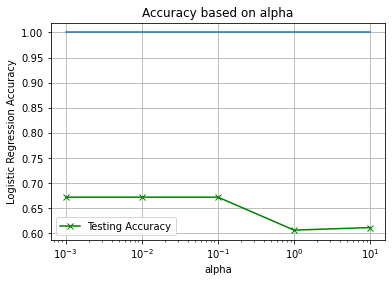

In [78]:
## Plot or table 
training_accuracy = [0,0,0,0,0]
testing_accuracy = [0,0,0,0,0]

alpha_Parameters = [0.00001, 0.0001, 0.001, 0.01, 0.1]

c1 = SGDClassifier(loss = 'log', max_iter = 1000, tol = 1.0e-4, alpha = 0.00001, random_state = 123, eta0 = 100)
c1.fit(X_train, Y_train)

c2 = SGDClassifier(loss = 'log', max_iter = 1000, tol = 1.0e-4, alpha = 0.0001, random_state = 123, eta0 = 100)
c2.fit(X_train, Y_train)

c3 = SGDClassifier(loss = 'log', max_iter = 1000, tol = 1.0e-4, alpha = 0.001, random_state = 123, eta0 = 100)
c3.fit(X_train, Y_train)

c4 = SGDClassifier(loss = 'log', max_iter = 1000, tol = 1.0e-4, alpha = 0.01, random_state = 123, eta0 = 100)
c4.fit(X_train, Y_train)

c5 = SGDClassifier(loss = 'log', max_iter = 1000, tol = 1.0e-4, alpha = 0.1, random_state = 123, eta0 = 100)
c5.fit(X_train, Y_train)


testing_accuracy[0] = accuracy_score(Y_test, c1.predict(X_test))
testing_accuracy[1] = accuracy_score(Y_test, c2.predict(X_test))
testing_accuracy[2] = accuracy_score(Y_test, c3.predict(X_test))
testing_accuracy[3] = accuracy_score(Y_test, c4.predict(X_test))
testing_accuracy[4] = accuracy_score(Y_test, c5.predict(X_test))

training_accuracy[0] = accuracy_score(Y_train, c5.predict(X_train))
training_accuracy[1] = accuracy_score(Y_train, c5.predict(X_train))
training_accuracy[2] = accuracy_score(Y_train, c5.predict(X_train))
training_accuracy[3] = accuracy_score(Y_train, c5.predict(X_train))
training_accuracy[4] = accuracy_score(Y_train, c5.predict(X_train))


plt.subplot(111)
plt.semilogx(my_Parameters, training_accuracy)
plt.grid(True)

plt.title("Accuracy based on alpha")
# plt.plot(my_Parameters, training_accuracy, label = "Training Accuracy", marker = "x")
plt.plot(my_Parameters, testing_accuracy, label = "Testing Accuracy", marker = "x", color = "green")

plt.legend()
plt.xlabel("alpha")
plt.ylabel("Logistic Regression Accuracy")
plt.show()
# Include a plot or table explaining how you selected and tuned your model. You must complete this step in the project.

## Results

_Using this cell, please write a short, clear paragraph explaining your results. In this class, we have mostly focused on accuracy. It is OK to measure your results in another quantitative way (e.g. precision or likelihood). Whatever you pick, make sure you are clear on what you are doing, and make sure you explain why your measurement of success makes sense._

Your answer here

In [79]:
# radnom state = is the random number generator
classifier = SGDClassifier(loss = 'perceptron', max_iter = 1000, tol = 1.0e-4, random_state = 123, eta0 = 10)
classifier.fit(X_train, Y_train)

print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

Training accuracy: 1.000000
Testing accuracy: 0.666667


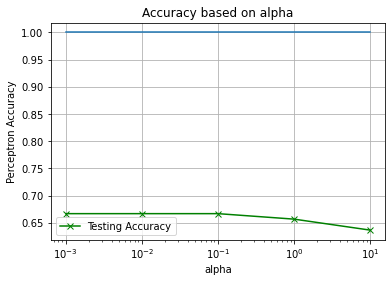

In [84]:
## Code 
## Plot or table 
training_accuracy = [0,0,0,0,0]
testing_accuracy = [0,0,0,0,0]

alpha_Parameters = [0.001, 0.01, 0.1, 1.0, 10.0]

c1 = SGDClassifier(loss = 'perceptron', max_iter = 1000, tol = 1.0e-4, alpha = 0.01, random_state = 123, eta0 = 100)
c1.fit(X_train, Y_train)

c2 = SGDClassifier(loss = 'perceptron', max_iter = 1000, tol = 1.0e-4, alpha = 0.1, random_state = 123, eta0 = 100)
c2.fit(X_train, Y_train)

c3 = SGDClassifier(loss = 'perceptron', max_iter = 1000, tol = 1.0e-4, alpha = 1.0, random_state = 123, eta0 = 100)
c3.fit(X_train, Y_train)

c4 = SGDClassifier(loss = 'perceptron', max_iter = 1000, tol = 1.0e-4, alpha = 10.0, random_state = 123, eta0 = 100)
c4.fit(X_train, Y_train)

c5 = SGDClassifier(loss = 'perceptron', max_iter = 1000, tol = 1.0e-4, alpha = 100.0, random_state = 123, eta0 = 100)
c5.fit(X_train, Y_train)


testing_accuracy[0] = accuracy_score(Y_test, c1.predict(X_test))
testing_accuracy[1] = accuracy_score(Y_test, c2.predict(X_test))
testing_accuracy[2] = accuracy_score(Y_test, c3.predict(X_test))
testing_accuracy[3] = accuracy_score(Y_test, c4.predict(X_test))
testing_accuracy[4] = accuracy_score(Y_test, c5.predict(X_test))

training_accuracy[0] = accuracy_score(Y_train, c5.predict(X_train))
training_accuracy[1] = accuracy_score(Y_train, c5.predict(X_train))
training_accuracy[2] = accuracy_score(Y_train, c5.predict(X_train))
training_accuracy[3] = accuracy_score(Y_train, c5.predict(X_train))
training_accuracy[4] = accuracy_score(Y_train, c5.predict(X_train))


plt.subplot(111)
plt.semilogx(my_Parameters, training_accuracy)
plt.grid(True)

plt.title("Accuracy based on alpha")
# plt.plot(my_Parameters, training_accuracy, label = "Training Accuracy", marker = "x")
plt.plot(my_Parameters, testing_accuracy, label = "Testing Accuracy", marker = "x", color = "green")

plt.legend()
plt.xlabel("alpha")
plt.ylabel("Perceptron Accuracy")
plt.show()
# Include a plot or table explaining how you selected and tuned your model. You must complete this step in the project.
    
# Include code showing how you arrived at your results. You must complete this step in the project.

    In my results I attempted to use perceptron and logistic regression models to determine which of the two gives better results. I discovered that because the logistic regression is more fitted to binary classification modeling, it yielded better results than the perceptron. The perceptron would be better fitted to linear classification. The logistic regression model performed the best when alpha was less than 0.001 and decreased as alpha increased.

## Error analysis

_Using this cell, please write a short, clear paragraph explaining what errors your model seems to be making, and offer a brief explanation based on your code below._ 

You must:
1. Perform some error analysis technique, such as making a confusion matrix or examining model mistakes.

Training accuracy: 1.000000
Testing accuracy: 0.606061


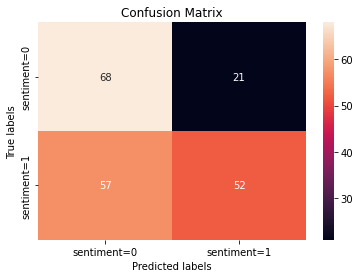

In [83]:
## Error analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix 
import seaborn

classifier = SGDClassifier(loss = 'log', max_iter = 100, tol = 1.0e-4,alpha= .01, random_state = 123, eta0 = 10)
classifier.fit(X_train, Y_train)

print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

prediction = classifier.fit(X_train, Y_train).predict(X_test)


confusionMatrix = confusion_matrix(Y_test,prediction)
confusionMatrix

plot = plt.subplot()
seaborn.heatmap(confusionMatrix, annot = True, fmt = 'g', ax = plot);

plot.set_xlabel('Predicted labels');plot.set_ylabel('True labels'); 
plot.set_title('Confusion Matrix'); 
plot.xaxis.set_ticklabels(['sentiment=0', 'sentiment=1']); plot.yaxis.set_ticklabels(['sentiment=0', 'sentiment=1']);
plt.show()
# Include code for error analysis here, to justify your conclusions. 
# You might make a confusion matrix, sample misclassifier data, analyze learned weights, or use any other method 
# discussed in class, or which makes sense for your model

## Summary and conclusion

_Using this cell, please write a short, clear paragraph describing how your results answer or do not answer your question. What are the implications of your findings? What new questions arise from your work?_

    My classifier is best at classifying the positive sentiments versus the negative ones. However, it does have a 40% error rate and could perform better. Questions that arise are why the classifier is better at classifying positive sentiments over negative ones. The implications of my findings show that logistic regression performs better than perceptron and that when alpha is under 0.001 it yields the best results. According to IMDB data, positive movies are more easily classified than movies with no sentiment. IMDB could use this information on their website by classifying the correct movies. The easiest way to increase the accuracy is by increasing the instances in the data. I used a sample of 250 and 200 to be able to process. When done at 1200 and 200, the results were slightly higher. 